In [1]:
import pandas  as pd
import numpy as  np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Placement.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
115,7.28,37.0,0
496,7.52,35.0,1
500,6.07,24.0,1
140,6.85,22.0,1
813,7.43,52.0,1


In [4]:
df.shape

(1000, 3)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4396\3071090039.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4396\3071090039.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


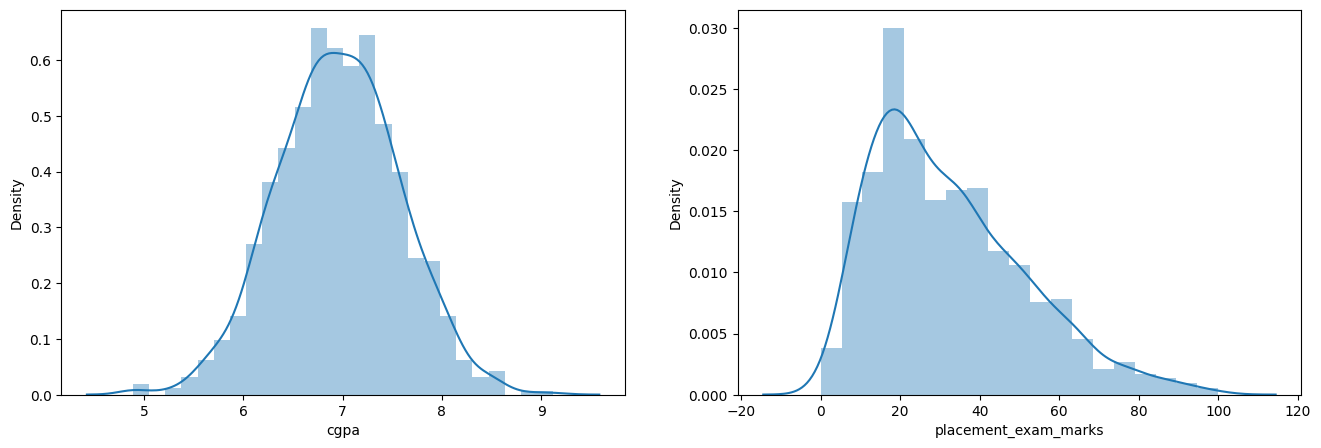

In [5]:
plt.figure(figsize =(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [6]:
df['placement_exam_marks'].skew() # here it not coloser to the 0 and it not normally distubued annd it skewed distibutied 

0.8356419499466834

In [7]:
df['cgpa'].skew() # here it not skewed it normally distubuted in the data 

-0.014529938929314918

In [8]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

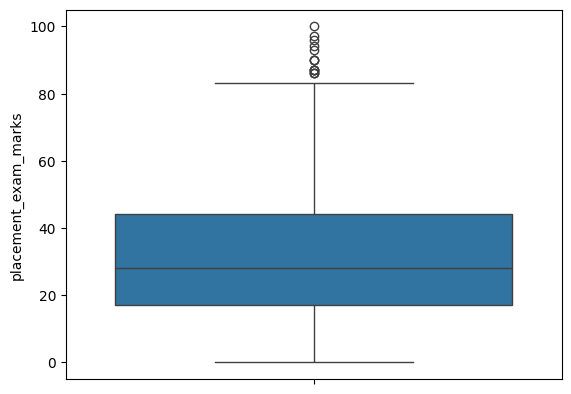

In [9]:
# here we ploting the box plot for the checking the outlies in the dataframe 
sns.boxplot(df['placement_exam_marks'])
plt.show()

In [10]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [11]:
percentile75

44.0

In [12]:
percentile25

17.0

In [13]:

iqr  = percentile75 - percentile25

In [14]:
iqr

27.0

In [15]:
upper_limit = percentile75 + 1.5 * iqr 
lower_limit = percentile25 - 1.5 * iqr 

In [16]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


# Finding Outliers 

In [17]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [18]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


# trimming 

In [19]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [20]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [21]:
new_df.shape

(985, 3)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4396\4291889059.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],color = 'g')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4396\4291889059.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'],co

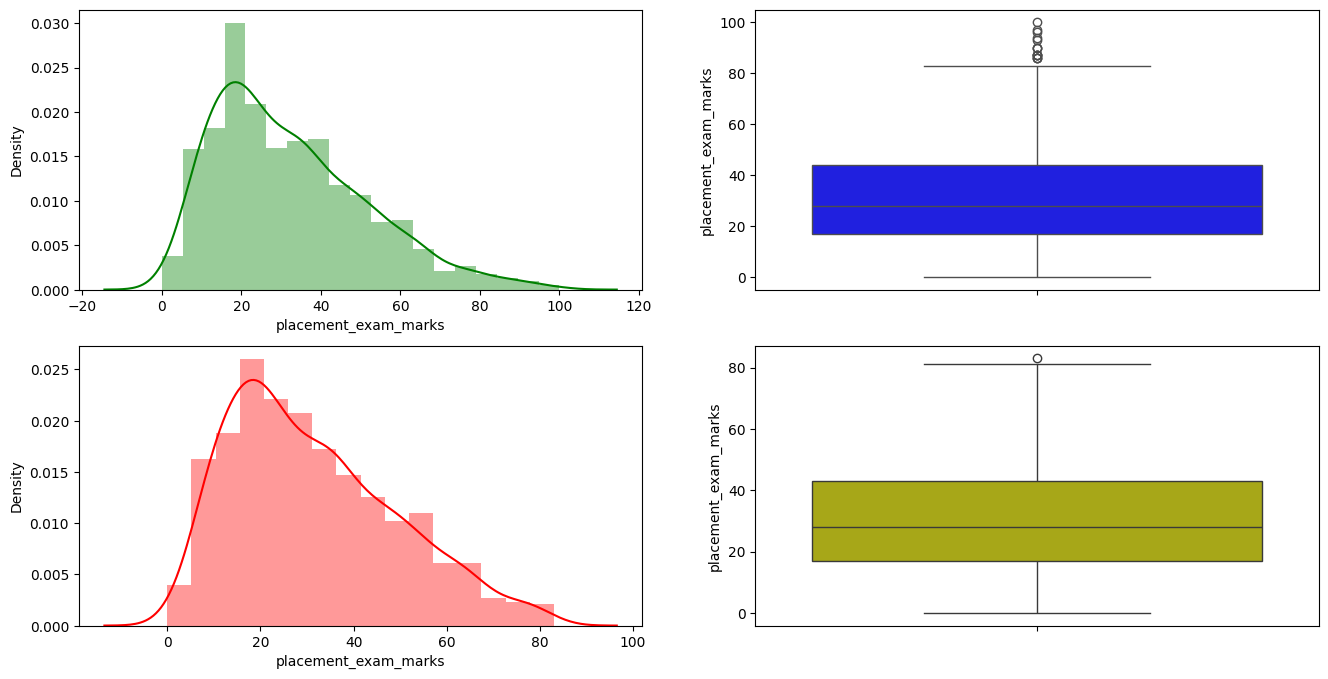

In [34]:
# comparing 

plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'],color = 'g')

# plt.figure(figsize = (16,8))
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],color = 'b')

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'],color = 'r')

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'],color = 'y')
# here due to this here outlies is remove in the given below
plt.show()

<br>
# Capping 
<br>
# here other wise we can use the capping 

In [29]:
new_df_cap = df.copy()


new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit, 
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] <lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)


In [31]:
new_df_cap.shape

(1000, 3)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4396\2570737362.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4396\2570737362.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


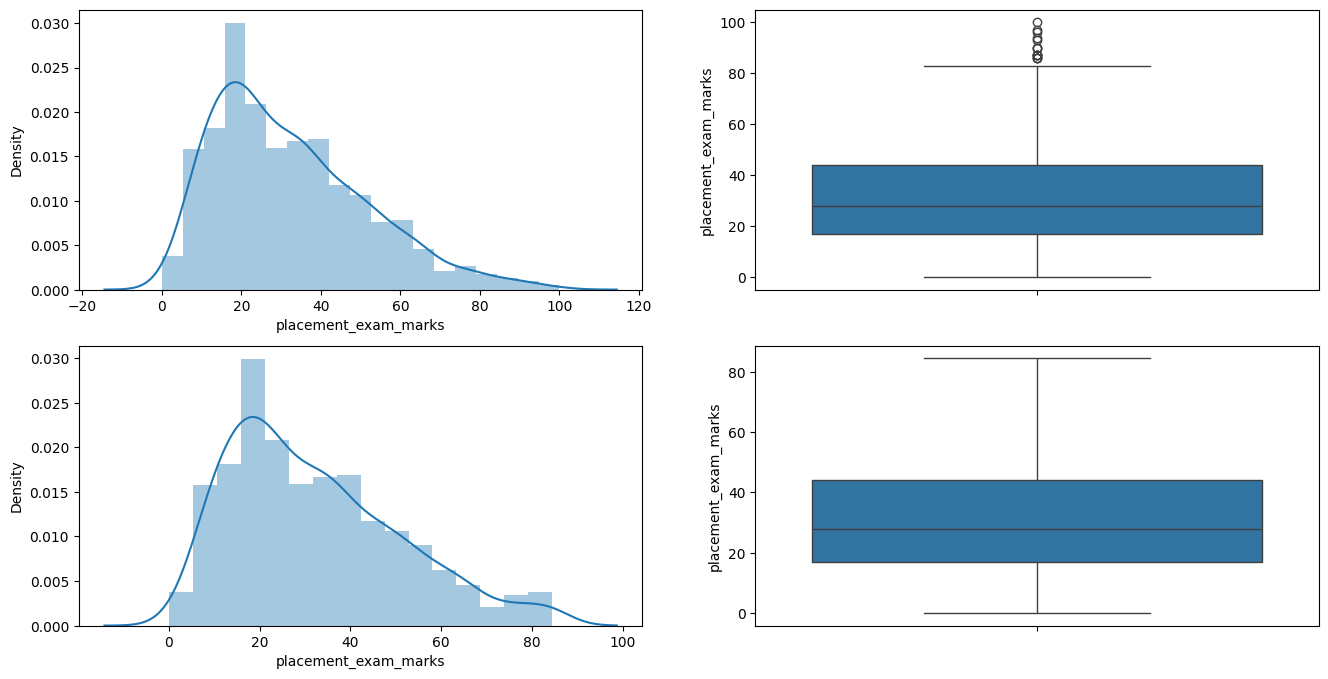

In [32]:
# comparing 

plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

# plt.figure(figsize = (16,8))
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])
# here due to this here outlies is remove in the given below
plt.show()